In [16]:
import meep as mp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Video


a = 0.000001  # unit scale in meep
c = 299792458  # speed of light in a vacuum

def freq_to_mp(frequency_in_hz):
    meep_freq = (frequency_in_hz * a)/c
    return meep_freq

def meter_to_mp(length_in_meters):
    aa = 1                                   # aa = 1 micro meter
    meep_length = length_in_meters/aa
    return meep_length

def sec_to_mp(time_in_secs):
    meep_time = time_in_secs*c/a
    return meep_time


In [14]:
def func():
    cell_x = 18
    cell_y = 14
    resolution = 20
    cell_size = mp.Vector3(cell_x, cell_y)
    pml_width = 2
    pml_layers = [mp.PML(thickness=pml_width)]

    rot_angle = np.radians(20)
    geometry = [
        mp.Block(
            center=mp.Vector3(),
            size=mp.Vector3(mp.inf, 1, mp.inf),
            e1=mp.Vector3(1, 0, 0),
            e2=mp.Vector3(0, 1, 0),
            material=mp.Medium(epsilon=12),
        )
    ]
    fsrc = freq_to_mp(45e12) # frequency of eigenmode or constant-amplitude source. 45THz
    print("freq, ", fsrc)
    kx = 1             # initial wavevector guess in x direction of the eigenmode
    kpoint = mp.Vector3(x=kx)
    bnum = 1  # band number of the eigenmode

##################### Source definition ##############################
    sources = [
        mp.EigenModeSource(
            #src=mp.ContinuousSource(fsrc, fwidth=0.5 * fsrc),
            src=mp.ContinuousSource(fsrc),
            center=mp.Vector3(-7),
            size=mp.Vector3(y=2),
            direction=mp.NO_DIRECTION,
            eig_kpoint=kpoint,
            eig_band=bnum,
            eig_match_freq=True,
        )
    ]

######################### Simulation #####################################
    sim = mp.Simulation(
        cell_size=cell_size,
        resolution=resolution,
        boundary_layers=pml_layers,
        sources=sources,
        geometry=geometry,
        # symmetries=[mp.Mirror(mp.Y, phase=-1)]
    )
    
    ###################### E-Field amplitude #################################
    # output_plane = mp.Volume(center=mp.Vector3(), size=mp.Vector3(3, 1))
    output_plane = mp.Volume(center=mp.Vector3(), size=mp.Vector3(x=cell_x-(pml_width*2),y= 1)) #for absolute efield
    sim.run(until=200)
    ez_data = sim.get_array(component=mp.Ez, vol=output_plane) #amplitude profile at a plane
    ez_data_real = np.real(ez_data)
    
    ##################### make a plot of efield absolute value##############
    ez_abs = np.power(abs(ez_data_real), 2)
    #ez_abs = ez_data_real
    ez_abs_0 = ez_abs[:, 0]  #first column of the ez_data
    print("max of ez_abs_0: ", np.amax(ez_abs_0))  ### max value in the ez_abs_0 data
    print("\nE-field data type: ", type(ez_abs), "\n")
    a,b = np.shape(ez_data)
    print("a: ", a)
    guide_length = cell_x-(pml_width*2) # length of the waveguide. ie x-direction
    x_length = np.linspace(start=0, stop=guide_length, num=a) #discretized guide length

    
    ###################set plot parameters#######################
    plt.xlim(0, guide_length)
    plt.ylim(0, max(ez_abs_0))
    plt.xlabel("lenght (\u00B5m)")
    plt.ylabel("field strenght (V/\u00B5m)")
    plt.plot(x_length, ez_abs_0)
    plt.show()

freq,  0.15010384283916842
-----------
Initializing structure...
time for choose_chunkdivision = 0.000738144 s
Working in 2D dimensions.
Computational cell is 18 x 14 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.23901 s
-----------
MPB solved for frequency_1(1,0,0) = 0.309282 after 29 iters
MPB solved for frequency_1(0.429553,0,0) = 0.148798 after 10 iters
MPB solved for frequency_1(0.433984,0,0) = 0.150103 after 6 iters
MPB solved for frequency_1(0.433988,0,0) = 0.150104 after 2 iters
Meep progress: 29.8/200.0 = 14.9% done in 4.0s, 22.9s to go
on time step 1192 (time=29.8), 0.00335811 s/step
Meep progress: 60.325/200.0 = 30.2% done in 8.0s, 18.5s to go
on time step 2414 (time=60.35), 0.00327522 s/step
Meep progress: 92.4/200.0 = 46.2% done in 12.0s, 14.0s to go
on time step 3698 (time=92.45), 0.00311779 s/step
Meep progress

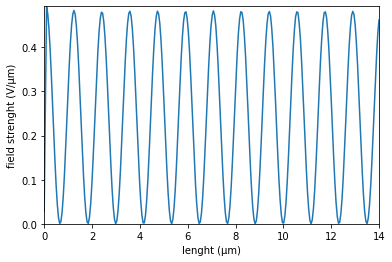

In [15]:
if __name__ == '__main__':
    func()